<a href="https://colab.research.google.com/github/sumunoh/study_assemble/blob/main/pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [29]:
import torch

In [30]:
torch.__version__

'1.10.0+cu111'

### 초기화 되지 않은 행렬 

In [31]:
x = torch.empty(4,2)
print(x)

tensor([[-3.2440e-17,  3.0780e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  0.0000e+00],
        [ 4.4721e+21,  1.5956e+25]])


### 무작위로 초기화된 행렬

In [32]:
x = torch.rand(4,2)
print(x)

tensor([[0.0162, 0.1521],
        [0.1238, 0.9322],
        [0.3174, 0.8683],
        [0.6401, 0.7035]])


### dtype이 long, 0으로 채워진 텐서

In [33]:
x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [34]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [35]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [36]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.1155, -0.4540, -0.6778,  1.5572],
        [ 0.0410, -1.2255,  0.3931,  0.3418]])


### 텐서의 크기

In [37]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [38]:
print(x)

tensor([[-0.1155, -0.4540, -0.6778,  1.5572],
        [ 0.0410, -1.2255,  0.3931,  0.3418]])


In [39]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.8254, 0.6429, 0.5906, 0.2575],
        [0.2833, 0.2868, 0.2456, 0.9772]])
tensor([[ 0.7099,  0.1889, -0.0872,  1.8147],
        [ 0.3243, -0.9387,  0.6388,  1.3191]])


### 덧셈2

In [40]:
print(torch.add(x,y))

tensor([[ 0.7099,  0.1889, -0.0872,  1.8147],
        [ 0.3243, -0.9387,  0.6388,  1.3191]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [41]:
result = torch.empty(2,4)
torch.add(x,y,out=result)
print(result)

tensor([[ 0.7099,  0.1889, -0.0872,  1.8147],
        [ 0.3243, -0.9387,  0.6388,  1.3191]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [42]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[-0.1155, -0.4540, -0.6778,  1.5572],
        [ 0.0410, -1.2255,  0.3931,  0.3418]])
tensor([[0.8254, 0.6429, 0.5906, 0.2575],
        [0.2833, 0.2868, 0.2456, 0.9772]])
tensor([[ 0.7099,  0.1889, -0.0872,  1.8147],
        [ 0.3243, -0.9387,  0.6388,  1.3191]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [43]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [44]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [45]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [46]:
# 행렬곱
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [47]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [48]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [49]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x)
print(y)
print(z)

tensor([[ 1.5020, -0.0425,  0.2846,  1.0376, -0.2547],
        [ 0.7216, -0.0931, -0.6556, -0.5550,  1.1451],
        [ 0.0859,  0.2413,  0.7387,  1.9930, -0.7801],
        [ 0.5768,  1.5846,  0.8124,  1.4189, -0.2176]])
tensor([ 1.5020, -0.0425,  0.2846,  1.0376, -0.2547,  0.7216, -0.0931, -0.6556,
        -0.5550,  1.1451,  0.0859,  0.2413,  0.7387,  1.9930, -0.7801,  0.5768,
         1.5846,  0.8124,  1.4189, -0.2176])
tensor([[ 1.5020, -0.0425,  0.2846,  1.0376],
        [-0.2547,  0.7216, -0.0931, -0.6556],
        [-0.5550,  1.1451,  0.0859,  0.2413],
        [ 0.7387,  1.9930, -0.7801,  0.5768],
        [ 1.5846,  0.8124,  1.4189, -0.2176]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [50]:
x = torch.randn(1)
print(x)
print(x.item()) # 실제값 출력
print(x.dtype)

tensor([0.1676])
0.1676102727651596
torch.float32


- 스칼라값 하나만 존재해야함

In [51]:
x = torch.randn(2)
print(x)
#print(x.item())
print(x.dtype)

tensor([ 0.2881, -0.4904])
torch.float32


### squeeze 
- 차원을 축소(제거)

In [52]:
tensor = torch.rand(1,3,3)
print(tensor)
tensor.shape

tensor([[[0.5299, 0.7437, 0.4784],
         [0.8243, 0.0922, 0.2742],
         [0.8393, 0.9693, 0.2086]]])


torch.Size([1, 3, 3])

In [53]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.5299, 0.7437, 0.4784],
        [0.8243, 0.0922, 0.2742],
        [0.8393, 0.9693, 0.2086]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [54]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[4.2681e-01, 4.6690e-02, 4.7871e-01],
         [2.0237e-01, 6.2012e-01, 1.0738e-02],
         [4.7988e-01, 3.3706e-04, 9.9344e-01]]])
torch.Size([1, 3, 3])


In [55]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[4.2681e-01, 4.6690e-02, 4.7871e-01],
          [2.0237e-01, 6.2012e-01, 1.0738e-02],
          [4.7988e-01, 3.3706e-04, 9.9344e-01]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [56]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [57]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim=1)

print(c)
print(c.size())

tensor([[[ 0.3094, -1.0249,  0.6884],
         [ 1.5908,  0.7143,  0.0670],
         [-0.9544, -1.2799, -0.4082],
         [ 0.8107, -0.1715,  0.5256],
         [ 0.7149, -0.7340, -0.3360],
         [-1.2282, -0.3442, -1.6217]]])
torch.Size([1, 6, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [58]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.3740, 0.1265, 0.7858, 0.8664, 0.3064, 0.7469],
        [0.7231, 0.3144, 0.7861, 0.0217, 0.5353, 0.1060],
        [0.3425, 0.7365, 0.8740, 0.0567, 0.9622, 0.0730]])
tensor([[0.3740, 0.1265],
        [0.7231, 0.3144],
        [0.3425, 0.7365]])
tensor([[0.7858, 0.8664],
        [0.7861, 0.0217],
        [0.8740, 0.0567]])
tensor([[0.3064, 0.7469],
        [0.5353, 0.1060],
        [0.9622, 0.0730]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [59]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.1008, 0.7035, 0.1338, 0.2387, 0.3634, 0.9025],
        [0.7439, 0.6135, 0.8221, 0.3167, 0.8453, 0.0639],
        [0.6608, 0.9405, 0.7685, 0.0059, 0.6214, 0.5139]])
tensor([[0.1008, 0.7035, 0.1338],
        [0.7439, 0.6135, 0.8221],
        [0.6608, 0.9405, 0.7685]])
tensor([[0.2387, 0.3634, 0.9025],
        [0.3167, 0.8453, 0.0639],
        [0.0059, 0.6214, 0.5139]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [60]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [61]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [62]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [63]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [64]:
import torch

In [65]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.7116])
-1.7116228342056274
torch.float32


In [66]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([-0.7116], device='cuda:0')
tensor([-0.7116], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산


-----------------------------------------------36:00

### Tensor

- data: tensor형태의 데이터

- grad: data가 거쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [67]:
import torch

In [68]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [69]:
y =x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [70]:
print(y.grad_fn)

In [71]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [72]:
a = torch.randn(3,3)
a = ((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [73]:
out.backward()

In [74]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [75]:
x = torch.randn(3, requires_grad=True)

y= x+2
while y.data.norm() < 1000:
  y = y* 2

  print(y)

tensor([3.5017, 5.6419, 3.3382], grad_fn=<MulBackward0>)
tensor([ 7.0033, 11.2837,  6.6763], grad_fn=<MulBackward0>)
tensor([14.0066, 22.5675, 13.3527], grad_fn=<MulBackward0>)
tensor([28.0133, 45.1349, 26.7053], grad_fn=<MulBackward0>)
tensor([56.0266, 90.2699, 53.4106], grad_fn=<MulBackward0>)
tensor([112.0532, 180.5397, 106.8212], grad_fn=<MulBackward0>)
tensor([224.1064, 361.0794, 213.6425], grad_fn=<MulBackward0>)
tensor([448.2128, 722.1588, 427.2850], grad_fn=<MulBackward0>)
tensor([ 896.4255, 1444.3176,  854.5699], grad_fn=<MulBackward0>)


In [76]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [77]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [78]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [79]:
import torch

In [80]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [81]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [82]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [83]:
b = a + 2 
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [84]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [85]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [86]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [87]:
print("a.data:", a.data)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [88]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.grad_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7f6134177710>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [89]:
print("c.data:", c.data)
print("c.grad:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7f6134192d10>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [90]:
print("out.data:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7f61341926d0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [91]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [92]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [93]:
print("x.data:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [94]:
print("y.data:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7f6133946e90>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [95]:
print("z.data:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7f6133946d50>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [96]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [97]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride= (2,1), padding=(4,2))

m = nn.Conv2d(16, 33, (3, 5), stride= (2,1), padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)

tensor([[[[ 1.2107e+00, -8.9721e-01,  1.7030e+00,  ..., -2.4119e-01,
           -1.1372e+00, -4.6238e-01],
          [-3.4082e+00,  6.6958e-01, -3.8466e-01,  ..., -8.3866e-01,
            1.1558e+00, -9.3928e-01],
          [ 6.2403e-01, -2.3749e+00, -2.6285e-01,  ...,  1.7329e+00,
            4.7746e-01, -9.9036e-01],
          ...,
          [ 3.2132e-01, -1.1086e-01, -3.4489e-01,  ..., -2.8381e+00,
           -6.0794e-01, -1.2603e+00],
          [ 2.8058e-01, -1.2274e+00, -2.8049e-02,  ...,  1.0078e-01,
           -2.8819e-01, -4.0672e-01],
          [ 1.7681e+00, -7.2928e-02, -2.6010e-01,  ..., -5.1353e-02,
           -1.0918e+00, -2.3113e+00]],

         [[-8.1234e-01, -8.1805e-01,  7.1764e-01,  ...,  9.9341e-01,
            3.1110e-01,  1.0334e-02],
          [-1.3506e+00, -7.0597e-02, -8.1445e-01,  ..., -1.7108e+00,
            1.6139e-01, -1.9666e-01],
          [ 1.3713e+00,  1.0921e+00, -1.5951e+00,  ...,  1.1742e-01,
            8.1828e-01,  6.6516e-01],
          ...,
     

In [98]:
print(output)

tensor([[[[-1.6649e-01, -6.6145e-02, -1.7634e-01,  ..., -4.3296e-01,
            6.6629e-02,  4.8870e-01],
          [ 8.8579e-01, -5.6675e-01,  3.2931e-01,  ...,  3.6401e-01,
           -1.6509e-01,  2.1530e-01],
          [-1.9703e-01, -2.5429e-01, -1.0370e-01,  ..., -2.6796e-01,
           -4.2169e-01,  5.1241e-01],
          ...,
          [-7.3157e-01, -7.3845e-01, -8.7178e-01,  ...,  2.7668e-03,
           -1.1870e+00,  1.9311e-01],
          [-7.9481e-01,  1.7793e-01, -6.9413e-01,  ..., -1.1027e-01,
            7.6722e-01,  6.7360e-02],
          [ 2.4827e-01,  1.6229e-01,  3.6774e-01,  ..., -5.0038e-01,
           -1.3534e-01,  6.2163e-01]],

         [[ 1.4093e-01, -3.4099e-02,  2.5146e-01,  ..., -4.1909e-01,
           -1.2858e-01, -1.8056e-01],
          [-1.1962e-01,  1.8907e-01, -5.3579e-01,  ..., -2.2538e-01,
            4.4342e-01,  7.7296e-01],
          [ 5.0663e-01,  2.5251e-01,  7.7551e-01,  ..., -5.7427e-01,
            9.5021e-01, -2.2268e-01],
          ...,
     

In [99]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [100]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [101]:
filters = torch.randn(8,4,3,3)

In [102]:
inputs = torch.randn(1,4,5,5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [103]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [104]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [105]:
import torch 
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
# 1:08:36

In [106]:
trainset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/edu/딥러닝/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/edu/딥러닝/',
                                      train=False,
                                      download=True,
                                      transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/edu/딥러닝/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/edu/딥러닝/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/edu/딥러닝/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/edu/딥러닝/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/edu/딥러닝/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/edu/딥러닝/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/edu/딥러닝/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/edu/딥러닝/MNIST/raw



In [107]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [108]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [109]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [111]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [113]:
image = torch_image.numpy()
image.shape

(28, 28)

In [114]:
label = labels[0].numpy()
label.shape

()

In [116]:
label

array(4)

<function matplotlib.pyplot.show>

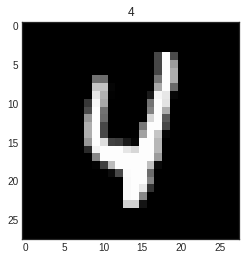

In [118]:
plt.title(label)
plt.imshow(image,'gray')
plt.show

## 각 Layer 설명

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [121]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [123]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [124]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [126]:
weight = weight.detach()

In [127]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

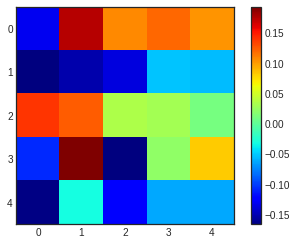

In [128]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [129]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [130]:
input_image = torch.unsqueeze(images[0], dim=0)

In [131]:
output_data = layer(input_image)

In [132]:
output = output_data.data

In [133]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

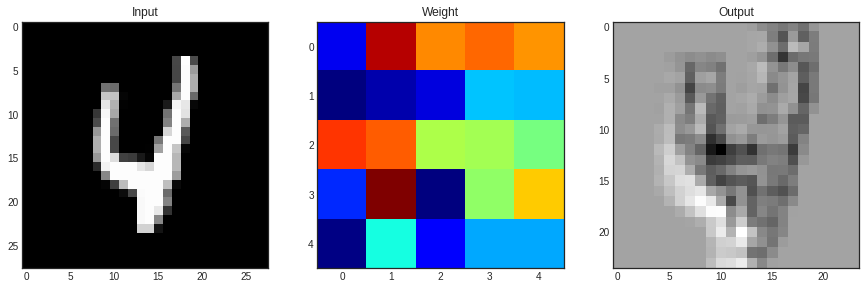

In [135]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [136]:
image.shape

(28, 28)

In [138]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [139]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

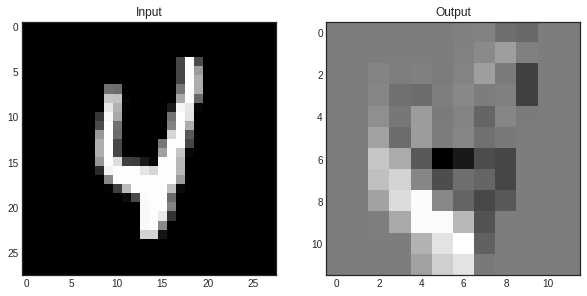

In [140]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [141]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [142]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [143]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [144]:
lin

tensor([[ 0.2324, -0.0611, -0.7597, -0.7489,  0.4561, -0.2646, -0.5994,  0.4076,
          0.0443, -0.8882]], grad_fn=<AddmmBackward0>)

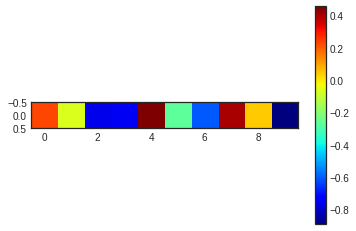

In [145]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [146]:
with torch.no_grad():
  flatten = image.view(1, 28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [147]:
softmax

tensor([[0.0871, 0.1491, 0.0784, 0.0319, 0.0870, 0.0557, 0.2973, 0.0822, 0.0696,
         0.0618]])

In [148]:
np.sum(softmax.numpy())

1.0000001

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [149]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [152]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

